In [53]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt

In [49]:
X, y = make_regression(n_samples = 1000, n_features=2, n_informative=2, n_targets=1)

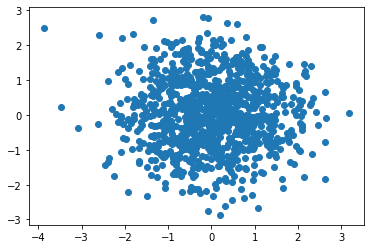

In [52]:
plt.scatter(X[:, 0], X[:, 1])

In [54]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [34]:
class KNNRegressor:
    def __init__(self, k:int) -> None:
        if k <= 0 or not isinstance(k, int):
            raise ValueError('k must be a positive integer')
            
        self.k = k
        
    def fit(self, x, y) -> 'KNNRegressor':
        self.x = x
        self.y = y
        
        return self
    
    def predict(self, points):
        predicted_values = []
        
        for point in points:
            distances = np.linalg.norm(self.x - point, axis=1)
            neigbors_indexes = distances.argsort()[:self.k]
            neigbors_values = self.y[neigbors_indexes]
            
            predicted_values.append(np.mean(neigbors_values))
            
        return np.array(predicted_values)

In [55]:
model = KNNRegressor(k=3).fit(x_train, y_train)

In [56]:
my_predictions = model.predict(x_val)

In [57]:
mae(my_predictions, y_val)

4.5313922295950855

In [59]:
model = KNeighborsRegressor(n_neighbors=3).fit(x_train, y_train)

In [60]:
sklearn_predictions = model.predict(x_val)

In [61]:
mae(sklearn_predictions, y_val)

4.5313922295950855

In [62]:
(sklearn_predictions == my_predictions).all()

True